In [16]:
# Import library
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 1. Perfect Balance

In [4]:
# Load dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

In [6]:
#  Lihat informasi dasar
print("Nama kelas:", iris.target_names)
print("Jumlah data:", len(y))

Nama kelas: ['setosa' 'versicolor' 'virginica']
Jumlah data: 150


In [8]:
#  Hitung distribusi kelas
counter = Counter(y)
total = sum(counter.values())

In [10]:
print("\nDistribusi kelas:")
for cls, cnt in counter.items():
    print(f"{iris.target_names[cls]:<15}: {cnt} data ({cnt/total:.2%})")


Distribusi kelas:
setosa         : 50 data (33.33%)
versicolor     : 50 data (33.33%)
virginica      : 50 data (33.33%)



Imbalance Ratio (max/min): 1.00


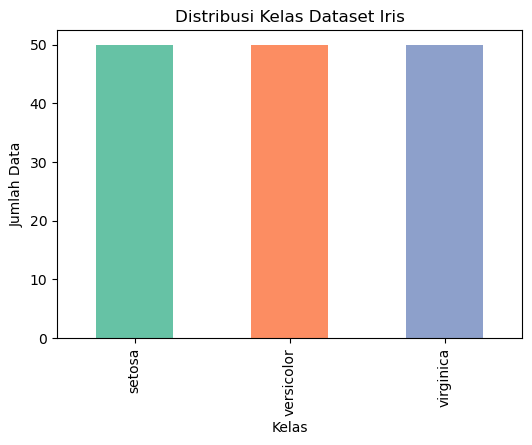

In [12]:
#  Hitung imbalance ratio (rasio kelas terbanyak dan tersedikit)
max_class = max(counter.values())
min_class = min(counter.values())
imbalance_ratio = max_class / min_class
print(f"\nImbalance Ratio (max/min): {imbalance_ratio:.2f}")


plt.figure(figsize=(6,4))
pd.Series(y).map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}).value_counts().plot(kind='bar', color=['#66c2a5','#fc8d62','#8da0cb'])
plt.title("Distribusi Kelas Dataset Iris")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

# 2. Imbalance

In [24]:
mask = np.ones_like(y, dtype=bool)
mask[np.where(y == 0)[0][:40]] = False   # hapus 40 data dari kelas setosa
y_imb = y[mask]

In [26]:
y_imb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
#  Hitung distribusi kelas
counter = Counter(y_imb)
total = sum(counter.values())

In [30]:
print("\nDistribusi kelas:")
for cls, cnt in counter.items():
    print(f"{iris.target_names[cls]:<15}: {cnt} data ({cnt/total:.2%})")


Distribusi kelas:
setosa         : 10 data (9.09%)
versicolor     : 50 data (45.45%)
virginica      : 50 data (45.45%)


In [32]:
#  Hitung imbalance ratio (rasio kelas terbanyak dan tersedikit)
max_class = max(counter.values())
min_class = min(counter.values())
imbalance_ratio = max_class / min_class
print(f"\nImbalance Ratio (max/min): {imbalance_ratio:.2f}")


Imbalance Ratio (max/min): 5.00


## Rasio Kelas Umum (Binary Classification)

| Rasio (Mayoritas : Minoritas) | Imbalance Ratio (IR) | Tingkat Imbalance | Keterangan |
|-------------------------------|----------------------|------------------|-------------|
| **< 60:40** | **< 1.5** | ⚪ **Seimbang** | Tidak perlu penyesuaian khusus |
| **≈ 70:30** | **1.5 – 2.5** | 🟡 **Mulai imbalanced ringan** | Masih bisa lanjut, tapi evaluasi pakai precision/recall |
| **≈ 80:20** | **2.5 – 4.0** | 🟠 **Imbalanced sedang** | Perlu perhatian, pertimbangkan `class_weight` |
| **≥ 90:10** | **4.0 – 9.0** | 🔴 **Imbalanced berat** | Wajib penanganan khusus (SMOTE, resampling, dll.) |
| **≥ 95:5 atau 99:1** | **> 9.0** | 🚨 **Sangat imbalanced / ekstrem** | Model default biasanya gagal belajar kelas minoritas |
